 # Machine learning

In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn import preprocessing, linear_model, model_selection,metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, f1_score


import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



In [2]:
df = pd.read_csv (r'C:\Users\USER\Documents\HIT- תואר ראשון מדעי המחשב\שנה ב\סימסטר ב\מבוא למדעי הנתונים\חומרים ללמידת מכונה\Final_after_outliers.csv')

In [3]:
df.describe()

,Unnamed: 0,AQI,Temperature,Humidity,Wind,Pressure,Forest_percentage,AQI_categotial,Population,Motor_vehicles_per_1k
count,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,3.473200e+04,34732.000000
mean,21892.361684,38.658730,22.863526,67.295952,85.413970,1012.793044,34.935368,1.271191,1.596259e+08,396.201284
std,12932.666934,26.633263,4.095971,19.209496,58.610979,4.271886,13.586778,0.562284,3.522404e+08,217.949277
min,0.000000,1.000000,11.000000,7.000000,0.000000,1001.000000,0.070000,1.000000,1.000000e+00,1.000000
25%,11947.750000,21.000000,20.000000,53.000000,38.000000,1011.000000,30.100000,1.000000,1.000000e+00,177.000000
50%,20774.500000,34.000000,23.000000,69.000000,74.000000,1013.000000,35.000000,1.000000,3.804175e+07,478.000000
75%,30587.250000,46.000000,25.000000,83.000000,119.000000,1015.000000,36.760000,1.000000,8.351704e+07,561.000000
max,58632.000000,261.000000,35.000000,100.000000,256.000000,1025.000000,90.200000,4.000000,1.366418e+09,824.000000


In [4]:
df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['Unnamed: 0', 'AQI', 'Temperature', 'Humidity', 'Wind', 'Pressure',
       'City', 'State', 'Country', 'Forest_percentage', 'AQI_categotial',
       'Population', 'Motor_vehicles_per_1k', 'AQI_under_150'],
      dtype='object')

In [5]:
df=df[['City', 'State','Country','Temperature', 'Humidity', 'Wind', 'Pressure', 'Forest_percentage', 'Population',
       'Motor_vehicles_per_1k', 'AQI_categotial','AQI']]
df

,City,State,Country,Temperature,Humidity,Wind,Pressure,Forest_percentage,Population,Motor_vehicles_per_1k,AQI_categotial,AQI
0,Ashkasham,Badakhshan,Afghanistan,14.0,37.0,105.0,1015.0,0.25,38041754.0,47.0,1.0,29.0
1,BazareTashkan,Badakhshan,Afghanistan,29.0,23.0,86.0,1005.0,0.25,38041754.0,47.0,1.0,42.0
2,HafizMoghul,Badakhshan,Afghanistan,22.0,26.0,52.0,1005.0,0.25,38041754.0,47.0,1.0,42.0
3,KuranwaMunjan,Badakhshan,Afghanistan,18.0,40.0,134.0,1013.0,0.25,38041754.0,47.0,1.0,42.0
4,Mashhad,Badakhshan,Afghanistan,31.0,21.0,85.0,1004.0,0.25,38041754.0,47.0,1.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34727,Beitbridge,MatabelelandSouth,Zimbabwe,20.0,25.0,83.0,1019.0,66.35,14645468.0,60.0,1.0,46.0
34728,Kwekwe,Midlands,Zimbabwe,15.0,14.0,41.0,1021.0,66.35,14645468.0,60.0,1.0,42.0
34729,Plumtree,MatabelelandSouth,Zimbabwe,15.0,21.0,78.0,1021.0,66.35,14645468.0,60.0,2.0,53.0
34730,Mvuma,Midlands,Zimbabwe,13.0,18.0,99.0,1022.0,66.35,14645468.0,60.0,1.0,42.0


In [6]:
df["AQI_under_150"]=df["AQI_categotial"]<=2
df.describe(include='all')

,City,State,Country,Temperature,Humidity,Wind,Pressure,Forest_percentage,Population,Motor_vehicles_per_1k,AQI_categotial,AQI,AQI_under_150
count,34732,34732,34732,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,3.473200e+04,34732.000000,34732.000000,34732.000000,34732
unique,33794,1432,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Marseille,Bavaria,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,13,1708,8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33374
mean,NaN,NaN,NaN,22.863526,67.295952,85.413970,1012.793044,34.935368,1.596259e+08,396.201284,1.271191,38.658730,NaN
std,NaN,NaN,NaN,4.095971,19.209496,58.610979,4.271886,13.586778,3.522404e+08,217.949277,0.562284,26.633263,NaN
min,NaN,NaN,NaN,11.000000,7.000000,0.000000,1001.000000,0.070000,1.000000e+00,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,20.000000,53.000000,38.000000,1011.000000,30.100000,1.000000e+00,177.000000,1.000000,21.000000,NaN
50%,NaN,NaN,NaN,23.000000,69.000000,74.000000,1013.000000,35.000000,3.804175e+07,478.000000,1.000000,34.000000,NaN
75%,NaN,NaN,NaN,25.000000,83.000000,119.000000,1015.000000,36.760000,8.351704e+07,561.000000,1.000000,46.000000,NaN


In [7]:
df.drop(['AQI_categotial'],axis=1, inplace=True)

In [8]:
df.describe(include='all')

,City,State,Country,Temperature,Humidity,Wind,Pressure,Forest_percentage,Population,Motor_vehicles_per_1k,AQI,AQI_under_150
count,34732,34732,34732,34732.000000,34732.000000,34732.000000,34732.000000,34732.000000,3.473200e+04,34732.000000,34732.000000,34732
unique,33794,1432,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Marseille,Bavaria,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,13,1708,8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33374
mean,NaN,NaN,NaN,22.863526,67.295952,85.413970,1012.793044,34.935368,1.596259e+08,396.201284,38.658730,NaN
std,NaN,NaN,NaN,4.095971,19.209496,58.610979,4.271886,13.586778,3.522404e+08,217.949277,26.633263,NaN
min,NaN,NaN,NaN,11.000000,7.000000,0.000000,1001.000000,0.070000,1.000000e+00,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,20.000000,53.000000,38.000000,1011.000000,30.100000,1.000000e+00,177.000000,21.000000,NaN
50%,NaN,NaN,NaN,23.000000,69.000000,74.000000,1013.000000,35.000000,3.804175e+07,478.000000,34.000000,NaN
75%,NaN,NaN,NaN,25.000000,83.000000,119.000000,1015.000000,36.760000,8.351704e+07,561.000000,46.000000,NaN


In [9]:
le = preprocessing.LabelEncoder()
df4reg=df
df4reg['City']=le.fit_transform(df['City'])
df4reg['State']=le.fit_transform(df['State'])
df4reg['Country']=le.fit_transform(df['Country'])
df4reg['AQI_under_150']=le.fit_transform(df['AQI_under_150'])
df4reg

,City,State,Country,Temperature,Humidity,Wind,Pressure,Forest_percentage,Population,Motor_vehicles_per_1k,AQI,AQI_under_150
0,1424,108,0,14.0,37.0,105.0,1015.0,0.25,38041754.0,47.0,29.0,1
1,2743,108,0,29.0,23.0,86.0,1005.0,0.25,38041754.0,47.0,42.0,1
2,11106,108,0,22.0,26.0,52.0,1005.0,0.25,38041754.0,47.0,42.0,1
3,15033,108,0,18.0,40.0,134.0,1013.0,0.25,38041754.0,47.0,42.0,1
4,18135,108,0,31.0,21.0,85.0,1004.0,0.25,38041754.0,47.0,42.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34727,2890,711,129,20.0,25.0,83.0,1019.0,66.35,14645468.0,60.0,46.0,1
34728,15105,731,129,15.0,14.0,41.0,1021.0,66.35,14645468.0,60.0,42.0,1
34729,23248,711,129,15.0,21.0,78.0,1021.0,66.35,14645468.0,60.0,53.0,1
34730,19900,731,129,13.0,18.0,99.0,1022.0,66.35,14645468.0,60.0,42.0,1


### load_dataset:

In [10]:
X=df4reg.drop(['AQI_under_150'],axis=1)
y=df4reg['AQI_under_150']

In [11]:
X=X.astype(int)
y=y.astype(int)

print(X)
print(y)

        City  State  Country  Temperature  Humidity  Wind  Pressure  \
0       1424    108        0           14        37   105      1015   
1       2743    108        0           29        23    86      1005   
2      11106    108        0           22        26    52      1005   
3      15033    108        0           18        40   134      1013   
4      18135    108        0           31        21    85      1004   
...      ...    ...      ...          ...       ...   ...       ...   
34727   2890    711      129           20        25    83      1019   
34728  15105    731      129           15        14    41      1021   
34729  23248    711      129           15        21    78      1021   
34730  19900    731      129           13        18    99      1022   
34731  15657    731      129           14        18     8      1022   

       Forest_percentage  Population  Motor_vehicles_per_1k  AQI  
0                      0    38041754                     47   29  
1            

### Basic data visulaization for hints on regression

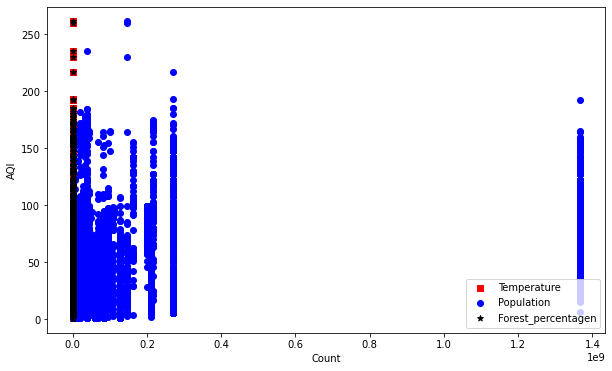

In [12]:
plt.scatter(x=df4reg['Temperature'],y=df['AQI'],c='r',marker='s',label='Temperature')
plt.scatter(x=df4reg['Population'],y=df['AQI'],c='b',marker='o',label='Population')
plt.scatter(x=df4reg['Forest_percentage'],y=df['AQI'],c='k',marker='*',label='Forest_percentagen')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Count')
plt.ylabel('AQI')
plt.show()

                           City     State   Country  Temperature  Humidity  \
City                   1.000000  0.019328  0.019288    -0.022337  0.017766   
State                  0.019328  1.000000  0.052585     0.042281  0.038252   
Country                0.019288  0.052585  1.000000     0.078559  0.092461   
Temperature           -0.022337  0.042281  0.078559     1.000000 -0.380530   
Humidity               0.017766  0.038252  0.092461    -0.380530  1.000000   
Wind                  -0.013513  0.037064 -0.031811     0.144774 -0.116307   
Pressure              -0.005514 -0.125731 -0.311291    -0.456276 -0.123473   
Forest_percentage      0.024578 -0.017347 -0.097793    -0.072033  0.084057   
Population            -0.030627  0.081890 -0.002895     0.306017  0.103957   
Motor_vehicles_per_1k  0.018669 -0.057422 -0.311425    -0.332361 -0.059851   
AQI                   -0.030554  0.023923  0.101848     0.276628  0.070670   

                           Wind  Pressure  Forest_percentage  P

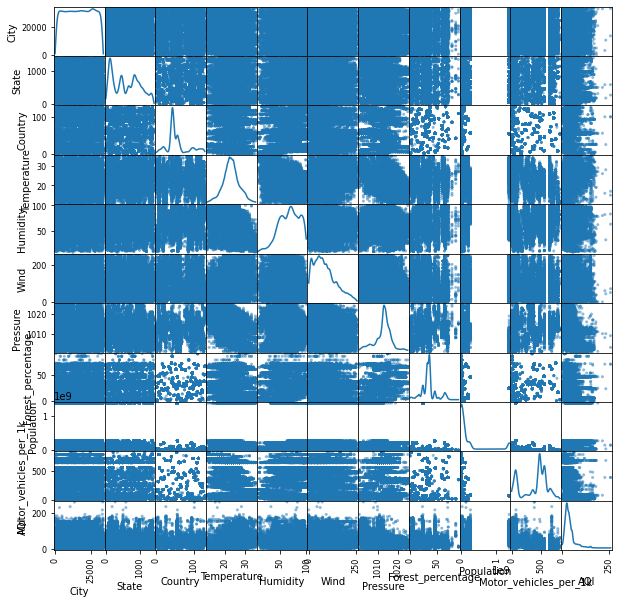

In [13]:
print(X.corr())
pd.plotting.scatter_matrix(X, figsize=(10, 10), diagonal='kde')
plt.show()

<AxesSubplot:>

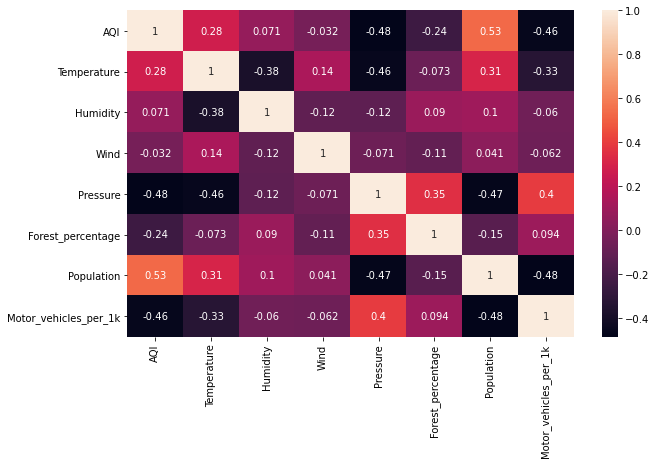

In [14]:
import seaborn as sns

df2=pd.DataFrame(df,columns =["AQI","Temperature","Humidity","Wind","Pressure","Forest_percentage","Population","Motor_vehicles_per_1k"])
sns.heatmap(df2.corr(), annot=True)

### split_to_train_and_test:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [-1.58296186e-16 -1.10794544e-16  5.70275437e-17  5.97126971e-17
 -5.07621857e-17  2.40385162e-17  7.27497562e-15  1.08684781e-16
 -3.32447564e-17 -1.89239383e-17 -8.08103309e-17]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [-0.02805475 -0.01545759  0.01023905  0.00396247  0.0042643   0.01283312
  0.02196224  0.01687934 -0.02171548  0.01147003 -0.02800391]
Standard Deviation:  [0.99687766 0.99615901 1.00157581 1.00639934 0.99133009 1.00937837
 0.99665982 1.0129327  0.96342237 0.99677311 0.96040561]


In [19]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Apply Machine Learning Algorithm - Train


In [20]:
trained = LinearRegression().fit(X_train, y_train)

In [21]:
clf_model = LogisticRegression().fit(X_train, y_train)

### Apply Machine Learning Algorithm - Predict

In [22]:
y_pred_lr=trained.predict(X_test) #linear

In [23]:
y_pred=clf_model.predict(X_test)  #logistic

## Res for LogisticRegression:

In [24]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1)
resDF[resDF["correct"]==1]
resDF

,Actual,Predicted,correct
29230,1,1,1
5047,1,1,1
24414,1,1,1
12353,1,1,1
1288,1,1,1
...,...,...,...
5403,1,1,1
2207,1,1,1
20626,1,1,1
8354,1,1,1


###  Evaluation 

In [25]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

print("correct:",len(resDF[resDF["correct"]==1]))
print("total:",len(resDF))
print("correct %:",len(resDF[resDF["correct"]==1])/len(resDF))

Initial amount of samples: #34732
Number of training samples: #27785
Number of test samples: #6947

Target distribution in original dataset:
1    33374
0     1358
Name: AQI_under_150, dtype: int64

Target distribution in the training set:
1    26669
0     1116
Name: AQI_under_150, dtype: int64

Target distribution in the test set:
1    6705
0     242
Name: AQI_under_150, dtype: int64
correct: 6565
total: 6947
correct %: 0.9450122354973369
